In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

## Cargar el dataset de Cancer de Mama

In [15]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

## Escalar las características para mejorar el rendimiento de la regresión logística


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dividir los datos en conjuntos de entrenamiento y prueba

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Crear el modelo de regresión logística

In [18]:
model = LogisticRegression(max_iter=200)

## Entrenar el modelo

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Realizar predicciones

In [20]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

## Evaluar el modelo

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.98
Matriz de confusión:
[[ 62   1]
 [  2 106]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Mostrar los coeficientes del modelo y gráfica de la matriz de confusión


Coeficientes del modelo (importancia de características):
mean radius: -0.3676704270220712
mean texture: -0.3688857021949802
mean perimeter: -0.3232654249461159
mean area: -0.42474991361863923
mean smoothness: -0.1846473167807077
mean compactness: 0.5956403875732605
mean concavity: -0.7698889583565676
mean concave points: -1.094418852757794
mean symmetry: 0.24096108544895914
mean fractal dimension: 0.14281688901957543
radius error: -1.2072269106828746
texture error: 0.1695390240123259
perimeter error: -0.5656048101023977
area error: -0.8815418252833895
smoothness error: -0.1718742405615594
compactness error: 0.6190852637037526
concavity error: -0.1071814461356837
concave points error: -0.46462320030504217
symmetry error: 0.5146379335903077
fractal dimension error: 0.6957006526602765
worst radius: -0.8061122129093679
worst texture: -1.3230627268010042
worst perimeter: -0.5339237203148237
worst area: -0.7722268868762947
worst smoothness: -0.5082855331265225
worst compactness: 0.10095567

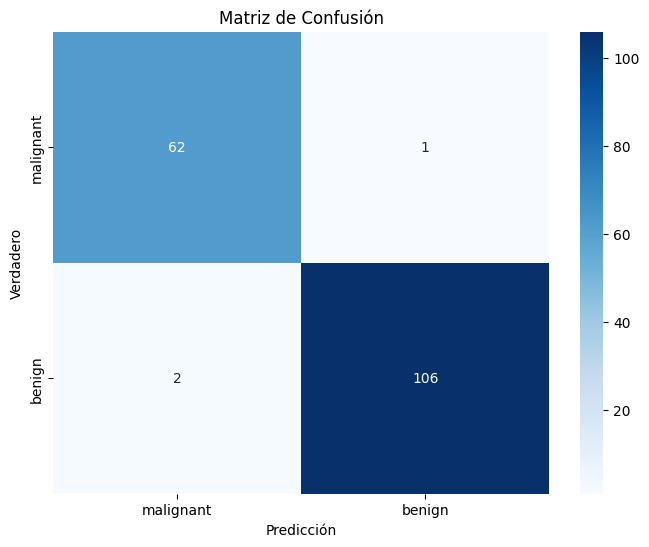

In [22]:
print("\nCoeficientes del modelo (importancia de características):")
for col, coef in zip(cancer.feature_names, model.coef_.T):
    print(f"{col}: {coef[0]}")

# Grafica matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

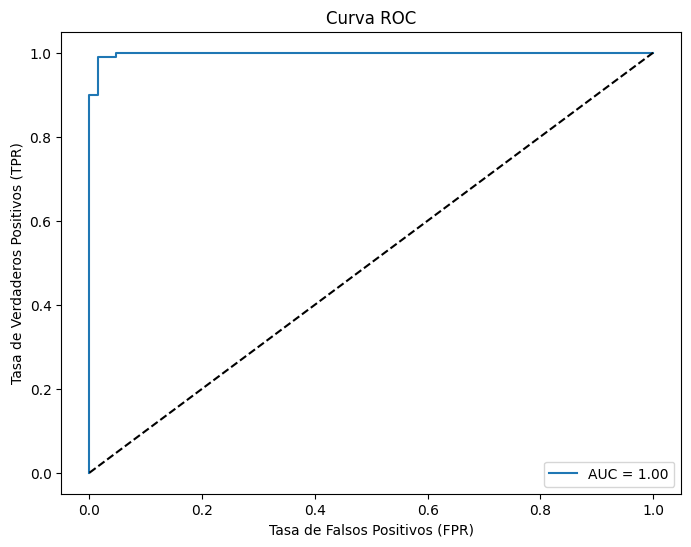

In [23]:
# Curva ROC y AUC para clasificación binaria
y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()